In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load the dataset
data = pd.read_csv(r"C:\Users\ujjai\Downloads\Real_Estate_Sales_2001-2022_GL.csv")
data.head()

C:\Users\ujjai\AppData\Local\Temp\ipykernel_15816\897061348.py:9: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\ujjai\Downloads\Real_Estate_Sales_2001-2022_GL.csv")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [23]:
data.shape

(1097629, 14)

In [24]:
# Strip white spaces from the 'Date Recorded' column
data['Date Recorded'] = data['Date Recorded'].str.strip()

# Now, convert to datetime and handle errors
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'], format='%m/%d/%Y', errors='coerce')

# Sort the data by the 'Date Recorded' column
data = data.sort_values('Date Recorded')

# Check the first few rows to verify the conversion
data.head(20)


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
857945,170177,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo,NaN,NaN,NaN,NaN
878495,173165,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family,NaN,NaN,NaN,NaN
882270,173202,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family,NaN,NaN,NaN,NaN
389725,60626,2006,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo,NaN,NaN,NaN,POINT (-72.72554 41.7149)
430262,60631,2006,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family,NaN,NaN,NaN,NaN
410497,60643,2006,2001-09-25,Naugatuck,217 OSBORN RD,183850.0,293711.0,0.625955,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.03061 41.47741)
106320,10055,2001,2001-10-01,Wethersfield,73 WILLOW ST,200200.0,308000.0,0.650000,NaN,NaN,NaN,NaN,NaN,NaN
77037,10004,2001,2001-10-01,Bristol,895 MATTHEWS ST UT 62,41390.0,63500.0,0.651811,NaN,NaN,14,NaN,NaN,NaN
103801,10068,2001,2001-10-01,Newtown,225 BERKSHIRE RD,121720.0,249000.0,0.488835,NaN,NaN,NaN,NaN,NaN,NaN
97411,10001,2001,2001-10-01,New Hartford,31 MAILLET LN,95480.0,160000.0,0.596750,NaN,NaN,1,NaN,NaN,POINT (-73.02736 41.88483)


In [25]:
# Remove the first 6 rows
data = data.iloc[6:].reset_index(drop=True)
data.head(20)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,10055,2001,2001-10-01,Wethersfield,73 WILLOW ST,200200.0,308000.0,0.650000,NaN,NaN,NaN,NaN,NaN,NaN
1,10004,2001,2001-10-01,Bristol,895 MATTHEWS ST UT 62,41390.0,63500.0,0.651811,NaN,NaN,14,NaN,NaN,NaN
2,10068,2001,2001-10-01,Newtown,225 BERKSHIRE RD,121720.0,249000.0,0.488835,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,2001,2001-10-01,New Hartford,31 MAILLET LN,95480.0,160000.0,0.596750,NaN,NaN,1,NaN,NaN,POINT (-73.02736 41.88483)
4,10087,2001,2001-10-01,Norwalk,30 ROWAYTON WOOD DR,118720.0,236000.0,0.503051,NaN,NaN,NaN,NaN,NaN,NaN
5,10008,2001,2001-10-01,Norwich,155-157 BOSWELL AVE,32600.0,85000.0,0.383529,NaN,NaN,NaN,NaN,NaN,NaN
6,10428,2001,2001-10-01,Middletown,CONGDON ST,89960.0,23197.0,3.878088,NaN,NaN,3,NaN,NaN,NaN
7,10001,2001,2001-10-01,Mansfield,17 STORRS HTS RD,115150.0,231750.0,0.496872,NaN,NaN,NaN,NaN,NaN,NaN
8,10302,2001,2001-10-01,Derby,262 SHAGBARK DR,71610.0,150000.0,0.477400,NaN,NaN,NaN,NaN,NaN,NaN
9,10003,2001,2001-10-01,Hartford,86 EUCLID ST W,47880.0,106000.0,0.451698,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print(data.isnull().sum())

Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     398389
Non Use Code         784172
Assessor Remarks     926395
OPM remarks         1084592
Location             799514
dtype: int64


In [27]:
# Clean the data: remove rows with missing Sale Amount or Date Recorded
data_cleaned = data.dropna(subset=['Date Recorded'])

In [28]:
print(data_cleaned.isnull().sum())

Serial Number             0
List Year                 0
Date Recorded             0
Town                      0
Address                  49
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382444
Residential Type     398387
Non Use Code         784170
Assessor Remarks     926393
OPM remarks         1084590
Location             799512
dtype: int64


In [29]:
# Convert Sale Amount to numeric
data_cleaned.loc[:, 'Sale Amount'] = pd.to_numeric(data_cleaned['Sale Amount'], errors='coerce')

In [30]:
data_cleaned.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,10055,2001,2001-10-01,Wethersfield,73 WILLOW ST,200200.0,308000.0,0.650000,NaN,NaN,NaN,NaN,NaN,NaN
1,10004,2001,2001-10-01,Bristol,895 MATTHEWS ST UT 62,41390.0,63500.0,0.651811,NaN,NaN,14,NaN,NaN,NaN
2,10068,2001,2001-10-01,Newtown,225 BERKSHIRE RD,121720.0,249000.0,0.488835,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,2001,2001-10-01,New Hartford,31 MAILLET LN,95480.0,160000.0,0.596750,NaN,NaN,1,NaN,NaN,POINT (-73.02736 41.88483)
4,10087,2001,2001-10-01,Norwalk,30 ROWAYTON WOOD DR,118720.0,236000.0,0.503051,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Set Date Recorded as index, resample to monthly frequency and take mean
#Cell 7
monthly_data = data_cleaned[['Date Recorded', 'Sale Amount']].set_index('Date Recorded')
monthly_data = monthly_data.resample('M').mean()
monthly_data.dropna(inplace=True)
monthly_data.head()

C:\Users\ujjai\AppData\Local\Temp\ipykernel_15816\3207969585.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = monthly_data.resample('M').mean()


,Sale Amount
Date Recorded,
2001-10-31,216944.755810
2001-11-30,228097.703772
2001-12-31,223109.779215
2002-01-31,234579.797155
2002-02-28,234632.829897


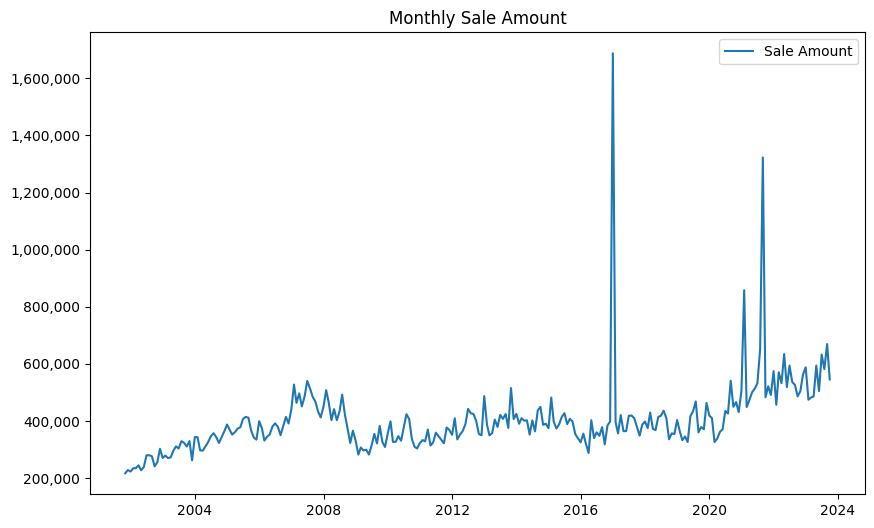

In [32]:
#Cell 8
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a custom formatter to display y-axis in regular numbers with commas
def millions_formatter(x, pos):
    return f'{int(x):,}'

# Plotting the Monthly Sale Amount
plt.figure(figsize=(10,6))
plt.plot(monthly_data, label='Sale Amount')

# Apply the custom formatter to y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Monthly Sale Amount')
plt.legend()
plt.show()



C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ujjai\AppData\Local\Temp\ipykernel_15816\3132144353.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]


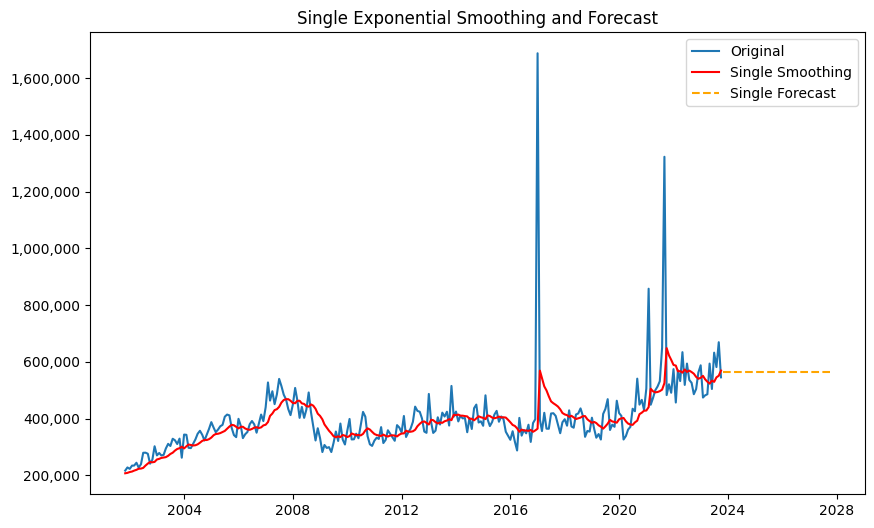

In [33]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Number of steps to forecast
forecast_steps = 48

# Single Exponential Smoothing
single_smooth = ExponentialSmoothing(monthly_data.dropna(), trend=None).fit()
single_forecast = single_smooth.forecast(forecast_steps)
# Create a future date range that matches the forecast period
last_date = monthly_data.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

# Plot Single Exponential Smoothing with forecast
plt.figure(figsize=(10,6))
plt.plot(monthly_data, label='Original')
plt.plot(single_smooth.fittedvalues, label='Single Smoothing', color='red')
plt.plot(forecast_index, single_forecast, label='Single Forecast', color='orange', linestyle='dashed')
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Single Exponential Smoothing and Forecast')
plt.legend()
plt.show()



C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


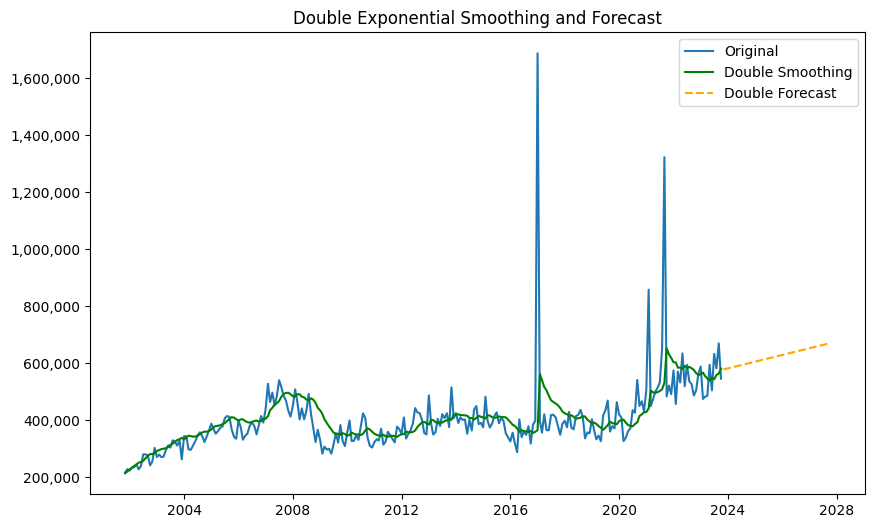

In [34]:
# Double Exponential Smoothing
double_smooth = ExponentialSmoothing(monthly_data.dropna(), trend="add").fit()
double_forecast = double_smooth.forecast(forecast_steps)

# Plot Double Exponential Smoothing with forecast
plt.figure(figsize=(10,6))
plt.plot(monthly_data, label='Original')
plt.plot(double_smooth.fittedvalues, label='Double Smoothing', color='green')
plt.plot(forecast_index, double_forecast, label='Double Forecast', color='orange', linestyle='dashed')
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Double Exponential Smoothing and Forecast')
plt.legend()
plt.show()

C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


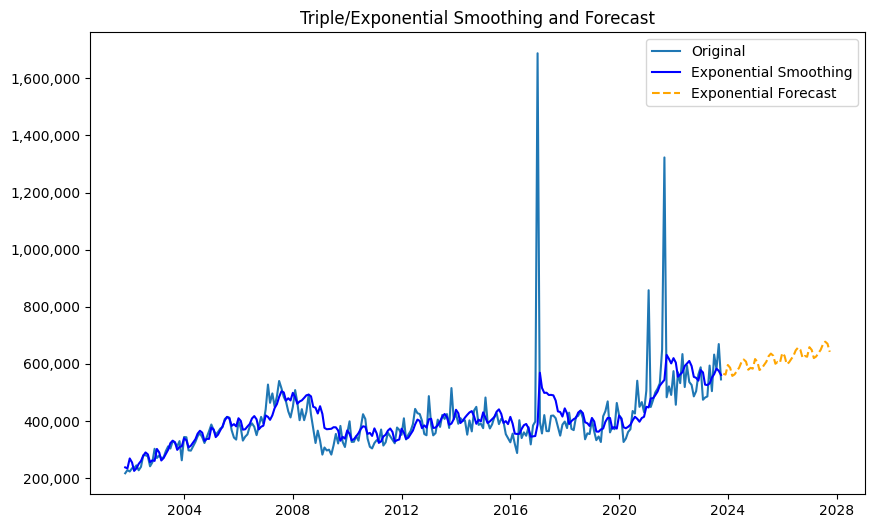

In [35]:
# Triple/Exponential Smoothing (with seasonal component)
exp_smooth = ExponentialSmoothing(monthly_data.dropna(), trend='add', seasonal='add', seasonal_periods=12).fit()
exp_forecast = exp_smooth.forecast(forecast_steps)

# Plot Triple/Exponential Smoothing with forecast
plt.figure(figsize=(10,6))
plt.plot(monthly_data, label='Original')
plt.plot(exp_smooth.fittedvalues, label='Exponential Smoothing', color='blue')
plt.plot(forecast_index, exp_forecast, label='Exponential Forecast', color='orange', linestyle='dashed')
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Triple/Exponential Smoothing and Forecast')
plt.legend()
plt.show()


In [36]:
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron

# ADF Test
adf_result = adfuller(monthly_data.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value For ADF: {adf_result[1]}")


ADF Statistic: -2.6364241768173877
p-value For ADF: 0.08570034707326246


In [37]:
# PP Test
pp_test = PhillipsPerron(monthly_data.dropna())
print(f"PP Test Statistic: {pp_test.stat}")
print(f"p-value For PP-Test: {pp_test.pvalue}")

PP Test Statistic: -13.7501342151867
p-value For PP-Test: 1.0543308318689678e-25


In [38]:
# KPSS Test
kpss_stat, p_value, lags, critical_values = kpss(monthly_data.dropna(), regression='c')
print(f"KPSS Statistic: {kpss_stat}")
print(f"p-value for KPSS: {p_value}")

KPSS Statistic: 1.4351531034767144
p-value for KPSS: 0.01


C:\Users\ujjai\AppData\Local\Temp\ipykernel_15816\1846309874.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(monthly_data.dropna(), regression='c')


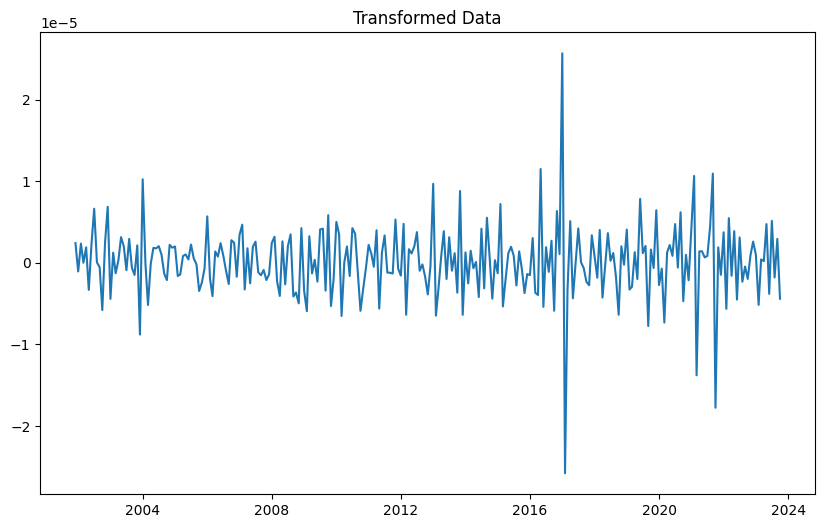

In [39]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Remove missing values from the data (since Box-Cox requires positive values)
cleaned_data = monthly_data['Sale Amount'].dropna()

# Step 2: Apply Box-Cox transformation
transformed_data, lambda_value = boxcox(cleaned_data)

# Step 3: First-order differencing
differenced_data = np.diff(transformed_data, n=1)  # First-order differencing

# Step 4: Create a new time index for differenced data (it will be 1 less than the original index)
differenced_index = cleaned_data.index[1:]

# Step 5: Plot the differenced data using the correct index (differenced_index)
plt.figure(figsize=(10,6))
plt.plot(differenced_index, differenced_data)
plt.title('Transformed Data')
plt.show()


In [40]:
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron

# ADF Test
adf_result = adfuller(differenced_data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value For ADF: {adf_result[1]}")

# PP Test
pp_test = PhillipsPerron(differenced_data)
print(f"PP Test Statistic: {pp_test.stat}")
print(f"p-value For PP-Test: {pp_test.pvalue}")

# KPSS Test
kpss_stat, p_value, lags, critical_values = kpss(differenced_data, regression='c')
print(f"KPSS Statistic: {kpss_stat}")
print(f"p-value for KPSS: {p_value}")


ADF Statistic: -6.520525033792338
p-value For ADF: 1.0449593909068573e-08
PP Test Statistic: -36.0768046809192
p-value For PP-Test: 0.0
KPSS Statistic: 0.18761249882182346
p-value for KPSS: 0.1


C:\Users\ujjai\AppData\Local\Temp\ipykernel_15816\3657583475.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(differenced_data, regression='c')


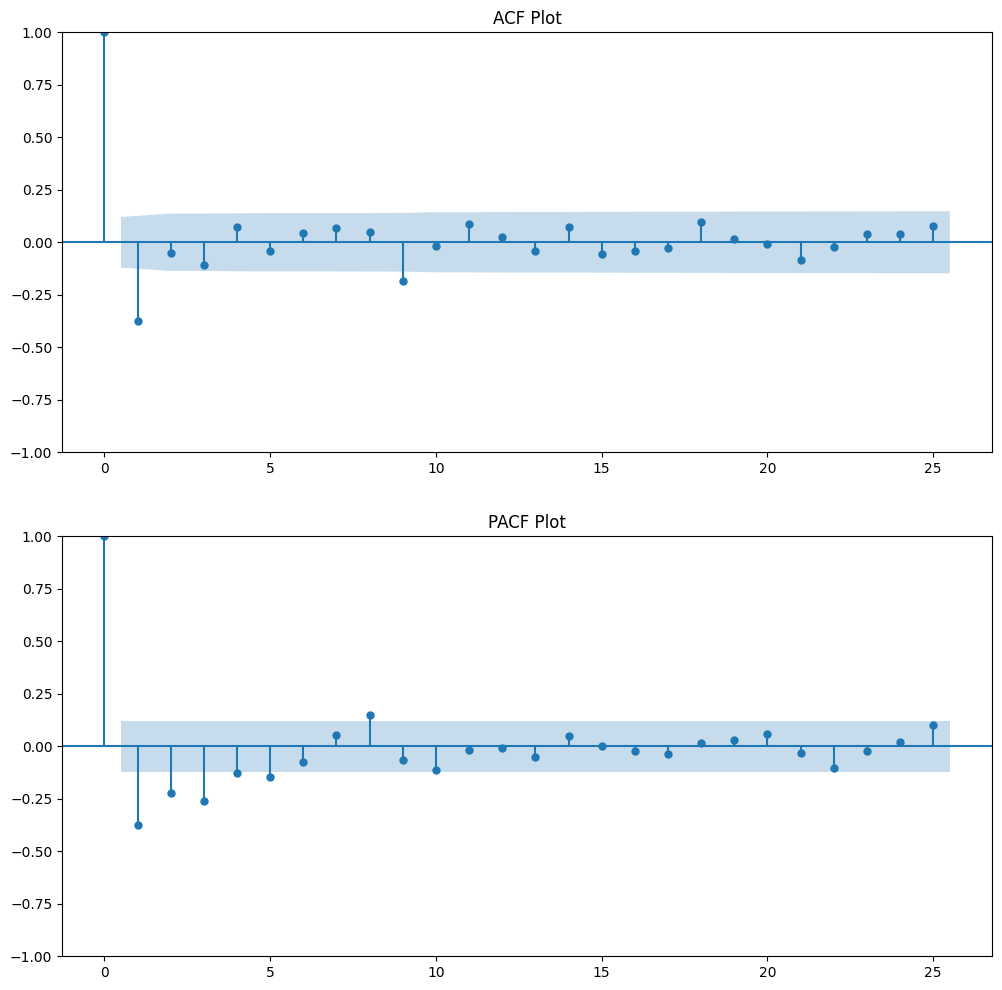

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# ACF plot
plot_acf(differenced_data, ax=ax[0])
ax[0].set_title('ACF Plot')

# PACF plot
plot_pacf(differenced_data, ax=ax[1])
ax[1].set_title('PACF Plot')

plt.show()

C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ujjai\AppData\Local\Temp\ipykernel_15816\3689053326.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=differenced_series.index[-1], periods=forecast_steps + 1, freq='M')[1:]


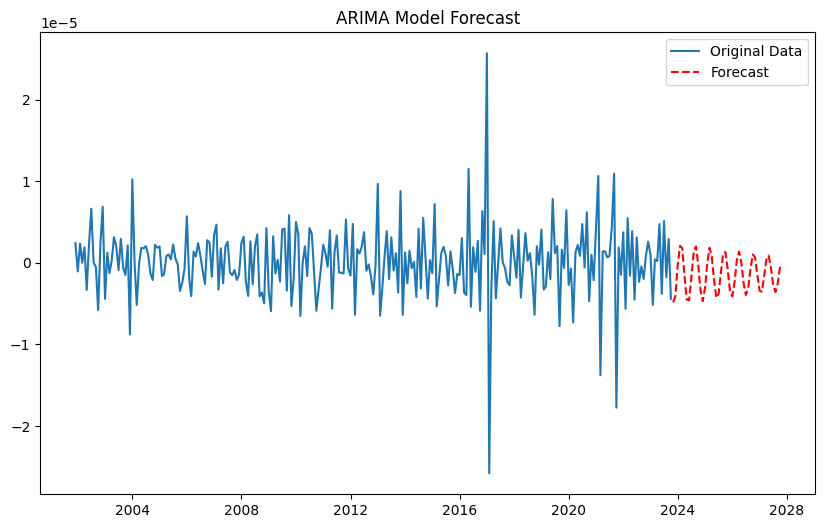

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Convert differenced data into a pandas Series, using the appropriate index
differenced_series = pd.Series(differenced_data, index=differenced_index)

# Step 2: Define the ARIMA model
# Adjust (p, d, q) based on your ACF/PACF results or use (3, 1, 1) as a starting point
model = ARIMA(differenced_series, order=(5, 1, 1))  # Adjust p, d, q based on ACF/PACF
arima_model = model.fit()



forecast_steps = 48  # Example: Forecast next 12 periods
forecast = arima_model.forecast(steps=forecast_steps)


forecast_index = pd.date_range(start=differenced_series.index[-1], periods=forecast_steps + 1, freq='M')[1:]


plt.figure(figsize=(10, 6))
plt.plot(differenced_series, label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()
